# code and date 
http://localhost:8206/lab/workspaces/auto-n/tree/code/MNF/notebooks/STRING_Data_11.5/test_withLowDCA_phylumeffect_STRINGFullPhyBalancePhyla_visulization_fullHomologous_oneBestHomologousPP.ipynb


# load lib and set data 

In [32]:
import sys
import os 
import pandas as pd
import numpy as np 
import copy 
import random
from collections import defaultdict
import pickle
import glob

import multiprocessing as mp 
import subprocess

import matplotlib.pyplot as plt 
import seaborn as sns

from Bio import AlignIO
from Bio import SeqIO
from Bio.Blast import NCBIXML


from Bio.PDB import PDBParser

import networkx as nx
from pyvis.network import Network #https://pyvis.readthedocs.io/en/latest/
from sklearn.manifold import MDS



from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import ADASYN
from sklearn.utils import shuffle

import  sklearn.metrics 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer


from scipy.stats import ttest_ind


import pkg_resources



In [33]:
%reload_ext autoreload
%autoreload 2

sys.path.append('../src/utilities/')

from ROC_curve import DCA_RocCurve
from ROC_curve import Random_RocCurve
# from ROC_curve import Precison_Recall_RocCurve

# #from PPI_benchmark_comparison import topDCAs_ML_predictions
# from Check_SameCogPair_problem import sepCogPairs_topDCAs_ML_predictions_getTestPPTuples
from Check_SameCogPair_problem import sepCogPairs_topDCAs_ML_predictions


# from IntergrateBestHomologousPPCoEvo_unNameSorted import getMetaFrame_withHighDCA
# from IntergrateBestHomologousPPCoEvo_unNameSorted import chooseBestHomologousPP
# from IntergrateBestHomologousPPCoEvo_unNameSorted import sepCogPairs_topDCAs_IndependentBenchPlusBestHomologousHighDCAPP_ML_predictions
# from IntergrateBestHomologousPPCoEvo_unNameSorted import get_SubjectInfo_FullBestHomologousPP
# from IntergrateBestHomologousPPCoEvo_unNameSorted import get_BestHomologousDCAs_fromMultiSpes
# from IntergrateBestHomologousPPCoEvo_unNameSorted import get_BestHomologousDCAs_fromMultiSpes_checkOrthologDCA


from IntergrateBestHomologousPPCoEvo_unNameSorted_ML import sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions
# from IntergrateBestHomologousPPCoEvo_unNameSorted import getMLPrediction_withHighDCA
# from IntergrateBestHomologousPPCoEvo_unNameSorted import get_SubjectMLPrediction_IndependentBenchPlusBestHomologouHighDCAPPDCAs
# from IntergrateBestHomologousPPCoEvo_unNameSorted import get_topDCAPosInSingleMSA_HighDCA_Dict
# from IntergrateBestHomologousPPCoEvo_unNameSorted import get_BestHomologousMLPredictions_fromMultiSpes
# #from IntergrateBestHomologousPPCoEvo_unNameSorted import IndependentBenchPlusBestHomologousHighDCAPPDCAs_BestHomologousMLPredictions_ML_predictions
# from IntergrateBestHomologousPPCoEvo_unNameSorted import sepCogPairs_IndependentBenchPlusBestHomologousHighDCAPPDCAs_BestHomologousMLPredictions_uniquePhyla_ML_predictions


# from IntergrateBestHomologousPPCoEvo_unNameSorted import get_topDCAPosInSingleMSA_BestHomologousPP_frameDict
# from IntergrateBestHomologousPPCoEvo_unNameSorted import topDCAPosInSingleMSA_frameDict2dictDict
# from IntergrateBestHomologousPPCoEvo_unNameSorted import topDCAPosInSingleMSA_frameDict2dictDict_reversedPP
# from IntergrateBestHomologousPPCoEvo_unNameSorted import topDCAs_PosInSingleMSA2oriPos
# from IntergrateBestHomologousPPCoEvo_unNameSorted import topDCAs_PosInSingleMSA2_2oriPos_2QueryOripos
# from IntergrateBestHomologousPPCoEvo_unNameSorted import plot_TopDCAPosForHomologousPP_PosInSingleMSA
# from IntergrateBestHomologousPPCoEvo_unNameSorted import numberOfOverlappedTopDCAPosForHomologousPP_PosInSingleMSA


# from IntergrateBestHomologousPPCoEvo_unNameSorted import collect_BestHomologousDCAs_OneSpeOneScore_OnlyTopPosNeg

# from IntergrateBestHomologousPPCoEvo_unNameSorted import sepCogPairs_smallPhylum_topDCAs_IndependentBenchPlusBestHomologousHighDCAPP_ML_predictions



# from IntergrateBestHomologousPPCoEvo_unNameSorted import replacingDCAScores_sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions
# from IntergrateBestHomologousPPCoEvo_unNameSorted import replacingOtherPhalaDCAScores_sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions

# from IntergrateBestHomologousPPCoEvo_unNameSorted import inputation_sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions
# from IntergrateBestHomologousPPCoEvo_unNameSorted import sortedOtherPhyla_FullPhylaIntegration_uniquePhyla_ML_predictions

from IntergrateBestHomologousPPCoEvo_top5_unNameSorted import get_SubjectInfo_top5DCAs_FullBestHomologousPP
from IntergrateBestHomologousPPCoEvo_top5_unNameSorted import get_BestHomologousDCAs_top5DCAs_fromMultiSpes
from IntergrateBestHomologousPPCoEvo_top5_unNameSorted_ML import VariousReplacing_sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_top5DCAs_uniquePhyla_ML_predictions

# from biasCheck import get_PPIwithTwoRibosomes_OnlyTest
# from biasCheck import get_PPIwithoutWithinRibosomess_OnlyTest
# from biasCheck import get_PPIwithNf90Sepration_OnlyTest
# from biasCheck import  getAllIdxOf_fixed_negVSpos_ratio
# from biasCheck import getAllIdxOf_fixed_negVSpos_ratio_keepCombination
from biasCheck import getAllIdxOf_fixed_negVSpos_ratio_keepCombination_from_OriginalFrame

# from collect_topCoEvos import collect_Nf90lenPair
# from collect_topCoEvos import sepCogPairs_ML_predictions_allTypeFeas
from ML_training import sepCogPairs_ML_predictions_allTypeFeas
from collect_topCoEvos import get_topRanking_CoEvo_file
# from collect_topCoEvos import get_pydcaFNAPC_IntraArrayandBetArray_max

# from pdb_benchmark import get_STRING1105_pdb_interact
# from pdb_benchmark import get_filter_pdbBenchmark
# from pdb_benchmark import add_pdbstatus
# from pdb_benchmark import add_pdbstatus_fromPosFrame

# from STRING_benchmark import  get_STRING1105_physical_interact
# from STRING_benchmark import  add_STRINGPhyPPI_status


In [34]:
n_jobs=50#80    #50  # 30

scoring_metrics=sklearn.metrics.make_scorer(sklearn.metrics.f1_score)    # None, sklearn.metrics.make_scorer(sklearn.metrics.f1_score)

In [35]:
Query_tuple=('1224', '511145')
Subject_tupleList=[("1239","1274374"),('201174', '105422'), ('976', '411476'),] 

In [36]:
notebookData_folder="/mnt/mnemo6/tao/notebook_data/"  #"/mnt/mnemo6/tao/"

In [37]:
CoEvo_data_folder=notebookData_folder+"PPI_Coevolution/CoEvo_data_STRING"+"11.5"+"/"
# Query_input_root_folder=CoEvo_data_folder+Query_tuple[1]+"_EggNOGmaxLevel"+Query_tuple[0]+"_eggNOGfilteredData/"
# Query_Benchmark_folder=Query_input_root_folder+"STRINGFullPhyBalancePhyla_Benchmark/"
Query_input_root_folder=CoEvo_data_folder+"allPPI_"+Query_tuple[1]+"_EggNOGmaxLevel"+Query_tuple[0]+"_eggNOGfilteredData/"
Query_Benchmark_folder=Query_input_root_folder+"STRINGFullPhyBalancePhyla_Benchmark/"
Query_ML_inputPath=Query_Benchmark_folder+"ML_inputs/"

Query_DCA_coevolutoin_path=Query_input_root_folder+"coevolutoin_result_DCA/"


Query_ML_inputPath

'/mnt/mnemo6/tao/notebook_data/PPI_Coevolution/CoEvo_data_STRING11.5/allPPI_511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGFullPhyBalancePhyla_Benchmark/ML_inputs/'

In [38]:
Query_DCA_coevolutoin_path,Query_Benchmark_folder

('/mnt/mnemo6/tao/notebook_data/PPI_Coevolution/CoEvo_data_STRING11.5/allPPI_511145_EggNOGmaxLevel1224_eggNOGfilteredData/coevolutoin_result_DCA/',
 '/mnt/mnemo6/tao/notebook_data/PPI_Coevolution/CoEvo_data_STRING11.5/allPPI_511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGFullPhyBalancePhyla_Benchmark/')

In [39]:

EggNOG_groupPath=notebookData_folder+"STRING_Data_11.5/eggnog5AddSTRING11.5_Species/groups/"


In [40]:
%%time
# read cog information 
max_level="2" #"2", "1224"
EggNOG_group_level2=pd.read_csv(EggNOG_groupPath+max_level+".tsv",
                                header=None,index_col=None,sep="\t")


# CPU times: user 25.6 s, sys: 3.03 s, total: 28.7 s
# Wall time: 28.7 s


CPU times: user 20.6 s, sys: 3.22 s, total: 23.8 s
Wall time: 23.8 s


In [41]:
Query_input_root_folder

'/mnt/mnemo6/tao/notebook_data/PPI_Coevolution/CoEvo_data_STRING11.5/allPPI_511145_EggNOGmaxLevel1224_eggNOGfilteredData/'

# prepare best homologous protein pp 

In [42]:
%%time 
with open(notebookData_folder+"PPI_Coevolution/STRING_data_11.5/511145_EggNOGmaxLevel1224_allQuery2SubjectPPIMapping/NameUnsorted_Query2Subject_QueSpeAllPPI_homologous_dict_listDict.pickle", 'rb') as handle:
        Query2Subject_QuerySpeAllPPI_BestHomologous_ignoreSubjectDCA_dict_listDict=pickle.load(handle)
        


CPU times: user 1.71 s, sys: 112 ms, total: 1.82 s
Wall time: 1.82 s


In [43]:
for _,t_dict in Query2Subject_QuerySpeAllPPI_BestHomologous_ignoreSubjectDCA_dict_listDict.items():
    print(_)
    print(len(t_dict))
    count=0
    for v in t_dict.values():
        count += len(v)
    print(count,count/2)

('1239', '1274374')
1510551
3021102 1510551.0
('201174', '105422')
1598711
3197422 1598711.0
('976', '411476')
1229632
2459264 1229632.0
('2', '179408')
1269201
2538402 1269201.0


In [44]:
Query2Subject_QuerySpeAllPPI_BestHomologous_ignoreSubjectDCA_dict_listDict={k:v for k,v in Query2Subject_QuerySpeAllPPI_BestHomologous_ignoreSubjectDCA_dict_listDict.items() if k in Subject_tupleList }

Query2Subject_QuerySpeAllPPI_BestHomologous_ignoreSubjectDCA_dict_listDict.keys()

dict_keys([('1239', '1274374'), ('201174', '105422'), ('976', '411476')])

In [45]:
list(Query2Subject_QuerySpeAllPPI_BestHomologous_ignoreSubjectDCA_dict_listDict[('1239', '1274374')].items())[0]



(('511145.b0003', '511145.b0004'),
 ('1274374.CBLK010000071_gene1043', '1274374.CBLK010000070_gene1131'))

# STRING 11.5, phylum 1224, species 511145

In [46]:
%%time
#why suddently becase so now ? because i update conda ?
#ßhere dont need to train  model but colelct data 
STRING115EggNog1224Spe511145_topDCAs_predicted_results=sepCogPairs_topDCAs_ML_predictions(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
                                                                                          EggNOG_group_level2=EggNOG_group_level2,
                                                                           ML_methods=["LR","RF"], #["LR","RF"],
                                                                           DCA_thres=0,DCA_number=50,selDca_number=20,
                                                                CoEvo_data_folder=CoEvo_data_folder,
                                                                                                       prefix="allPPI_",
                                                                            benchmark_suffix="STRINGFullPhyBalancePhyla_Benchmark/",
                                                                                          ifReCollect=False,
                                                                                         saveFrame=True,
                                                                                         overwrite=False,
                                                                                        splitPosandNeg=False,
                                                                                         sort_frame=False,
                                                                                          use_multiprocessing=30,
                                                                                    n_jobs=n_jobs,
                                                                scoring_metrics=scoring_metrics,
                                                                                         )

# first time 
# CPU times: user 1min 25s, sys: 13.2 s, total: 1min 38s
# Wall time: 42min 12s

# second time with  ML_methods=["LR","RF"
# CPU times: user 22min 16s, sys: 37.6 s, total: 22min 53s
# Wall time: 1h 26min 41

# # for F1 scoring 
# CPU times: user 17min 56s, sys: 36.2 s, total: 18min 32s
# Wall time: 2h 15min 31s


ML_inputs: /mnt/mnemo6/tao/notebook_data/PPI_Coevolution/CoEvo_data_STRING11.5/allPPI_511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGFullPhyBalancePhyla_Benchmark/ML_inputs/
Benchmark_folder: /mnt/mnemo6/tao/notebook_data/PPI_Coevolution/CoEvo_data_STRING11.5/allPPI_511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGFullPhyBalancePhyla_Benchmark/
allPPI_allInfo_frame.shape: (420412, 5)
len(CurrentSpe_EggNOG_group_level2_pro2cog): 4036
len(allPPI_cogs): 420412
len(allPPI_info): 420412
top_CoEvo_frame.shape: (420412, 152)
sys.getsizeof(top_CoEvo_frame)/(1024*1024*1024):0.5238795801997185
OnlyTopPosNeg_NonPara_XtopDCAs.ndim: 2
XtopDCAs_train.shape,XtopDCAs_test.shape,ytopDCAs_train.shape,ytopDCAs_test.shape: (336329, 20) (84083, 20) (336329,) (84083,)
[['COG1516', 'COG0479'], ['COG2011', 'COG0250'], ['COG0024', 'COG3123']]
len(cogs_train_dict): 249966
len(cogs_test),len(Moved_test_idx),len(Kepted_test_idx): 84083 34380 49703
XtopDCAs_train.shape,ytopDCAs_train.shape,sum(ytopDCAs_train

Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/mnt/mnemo5/tao/anaconda3/envs/py37_notebook/lib/python3.7/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/mnt/mnemo5/tao/anaconda3/envs/py37_gpu/lib/python3.7/site-packages/joblib/externals/loky/backend/synchronize.py", line 96, in _cleanup
    sem_unlink(name)
FileNotFoundError: [Errno 2] No such file or directory
Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/mnt/mnemo5/tao/anaconda3/envs/py37_notebook/lib/python3.7/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/mnt/mnemo5/tao/anaconda3/envs/py37_gpu/lib/python3.7/site-packages/joblib/externals/loky/backend/synchronize.py", line 96, in _cleanup
    sem_unlink(name)
FileNotFoundError: [Errno 2] No such file or directory
Exception ignored in: <Finalize object, dead>
Traceback (mos

LR ConvergenceWarning:  Liblinear failed to converge, increase the number of iterations.


Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/mnt/mnemo5/tao/anaconda3/envs/py37_notebook/lib/python3.7/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/mnt/mnemo5/tao/anaconda3/envs/py37_gpu/lib/python3.7/site-packages/joblib/externals/loky/backend/synchronize.py", line 96, in _cleanup
    sem_unlink(name)
FileNotFoundError: [Errno 2] No such file or directory
Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/mnt/mnemo5/tao/anaconda3/envs/py37_notebook/lib/python3.7/multiprocessing/util.py", line 224, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/mnt/mnemo5/tao/anaconda3/envs/py37_gpu/lib/python3.7/site-packages/joblib/externals/loky/backend/synchronize.py", line 96, in _cleanup
    sem_unlink(name)
FileNotFoundError: [Errno 2] No such file or directory
Exception ignored in: <Finalize object, dead>
Traceback (mos

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1), EXIT(1)}

In [47]:
STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]["Model"]

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fa530bb2150>,
             estimator=RandomForestClassifier(n_jobs=4, random_state=0),
             n_jobs=50,
             param_grid={'class_weight': [{1: 1}, {1: 10}, {1: 50}],
                         'max_depth': [5, 8, 8], 'max_features': [2, 3, 5],
                         'n_estimators': [10, 100, 500]},
             scoring=make_scorer(f1_score))

In [48]:
STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]["Model"].best_estimator_


RandomForestClassifier(class_weight={1: 10}, max_depth=5, max_features=5,
                       n_estimators=500, n_jobs=4, random_state=0)

In [49]:
STRING115EggNog1224Spe511145_topDCAs_predicted_results.keys()

dict_keys(['XtopDCAs', 'YtopDCAs', 'XtopDCAs_train', 'XtopDCAs_test', 'ytopDCAs_train', 'ytopDCAs_test', 'LR', 'RF', 'updated_allPPI_allInfo_frame'])

In [50]:
sum(STRING115EggNog1224Spe511145_topDCAs_predicted_results["YtopDCAs"]==1),sum(STRING115EggNog1224Spe511145_topDCAs_predicted_results["YtopDCAs"]==0)

(5532, 414880)

### use plot check overfitting 

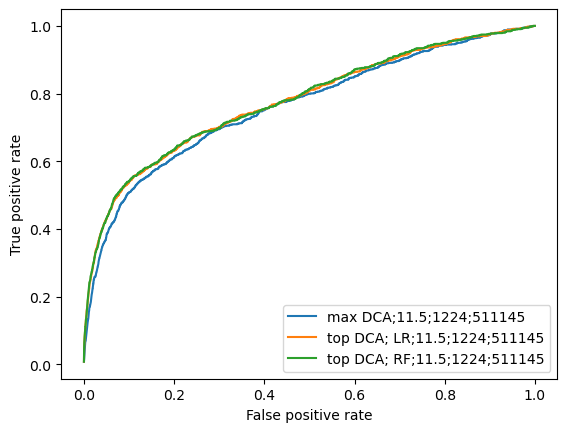

In [51]:

count_label="rate"
step=10
DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step)

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; RF"+";11.5;1224;511145",step=step)



plt.show()

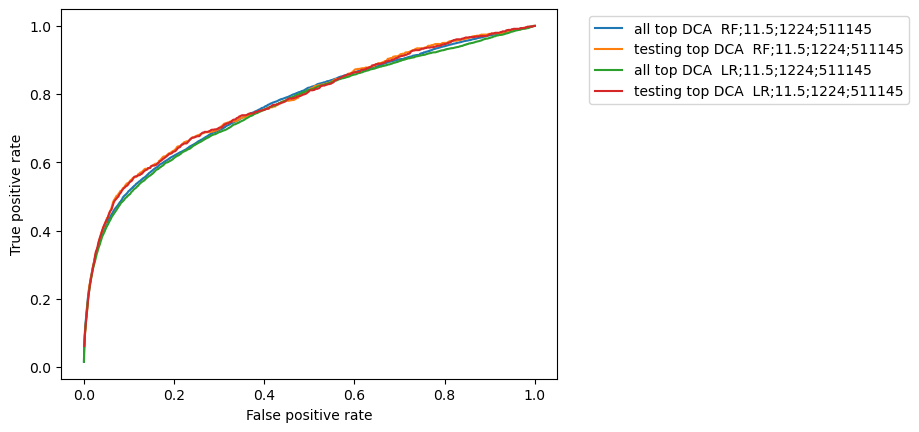

CPU times: user 4.67 s, sys: 124 ms, total: 4.8 s
Wall time: 4.62 s


In [52]:
%%time
count_label="rate"
step=100
zoom_thres=None



DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["updated_allPPI_allInfo_frame"]["RF_onesProb"], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results['YtopDCAs'],
             count_label=count_label,legend="all top DCA  RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="testing top DCA  RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["updated_allPPI_allInfo_frame"]["LR_onesProb"], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results['YtopDCAs'],
             count_label=count_label,legend="all top DCA  LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="testing top DCA  LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

# For Ecoli 11.5, get its top 5 DCA score from its BestHomologous pp from other speceis 



In [53]:

HighDCA_Query_allPPI_allInfo_frame=pd.read_csv(Query_Benchmark_folder+"allPPI_allInfo_frame.csv",
                                 header=0,index_col=None,sep="\t")
print(HighDCA_Query_allPPI_allInfo_frame.shape)
HighDCA_Query_allPPI_allInfo_frame.head(n=3)

(420412, 5)


,STRING_ID1,STRING_ID2,benchmark_status,len1,len2
0,511145.b0089,511145.b0094,P,390,410
1,511145.b2277,511145.b2278,P,491,608
2,511145.b2751,511145.b2762,P,471,238


In [54]:
%%time 

HighDCA_Query_allPPI_info=HighDCA_Query_allPPI_allInfo_frame.loc[:,["STRING_ID1","STRING_ID2","benchmark_status","len1","len2"]].values.tolist()

HighDCA_Query_allPPI_allInfo_dict=dict([((p1,p2),(s,len1,len2)) for p1,p2,s,len1,len2 in HighDCA_Query_allPPI_info])




CPU times: user 324 ms, sys: 48 ms, total: 372 ms
Wall time: 371 ms


In [55]:
HighDCA_Query_topRanking_pydcaFNAPC_file=Query_Benchmark_folder+"DCA_thres_"+str(0)+"_topRanking_pydcaFNAPC_frame.csv" 
print(HighDCA_Query_topRanking_pydcaFNAPC_file)

HighDCA_Query_allPPI_info=HighDCA_Query_allPPI_allInfo_frame.loc[:,["STRING_ID1","STRING_ID2","len1","len2"]].values.tolist()



/mnt/mnemo6/tao/notebook_data/PPI_Coevolution/CoEvo_data_STRING11.5/allPPI_511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGFullPhyBalancePhyla_Benchmark/DCA_thres_0_topRanking_pydcaFNAPC_frame.csv


In [56]:
%%time 
HighDCA_Query_top_pydcaFNAPC_dict=get_topRanking_CoEvo_file(topRanking_CoEvo_file=HighDCA_Query_topRanking_pydcaFNAPC_file,
                                               coevolutoin_path=Query_DCA_coevolutoin_path,
                                               coevo_suffix="_pydcaFNAPC_array",
                                               allPPI_info=HighDCA_Query_allPPI_info, 
                                               returnDic=True,
                                               overwrite=False,
                                            use_multiprocessing=10
                                                             )


top_CoEvo_frame.shape: (420412, 152)
sys.getsizeof(top_CoEvo_list)/(1024*1024*1024):0.0031323805451393127
CPU times: user 10.6 s, sys: 1.64 s, total: 12.2 s
Wall time: 12.2 s


In [57]:
# here to read all homoglogs dca info we here 
# and because when we computer homologous DCA , we also use pp with low dca in ecoli speceis, so it has all 
BestHomologousPP_top5DCAs_Subject_allPPI_allInfo_dict_listDict=get_SubjectInfo_top5DCAs_FullBestHomologousPP(Query_tuple,
                                                                                                  Subject_tupleList,
                                                                                                  STRING_version="11.5",
                                                                                                  benchmark_suffix="AllPPI_Benchmark/",
                                                                                                CoEvo_data_folder=CoEvo_data_folder,
                                                                                                  topDCA_num=5,
                                                                                                   returnDic=True,
                                                                                                    overwrite=False,
                                                                                                    use_multiprocessing=10,
                                                                                                        )



1239 1274374
BestHomologousPP_Benchmark_folder: /mnt/mnemo6/tao/notebook_data/PPI_Coevolution/CoEvo_data_STRING11.5/1274374_EggNOGmaxLevel1239_eggNOGfilteredData/BestHomologousPPFor511145AtEggNOGmaxLevel1224_AllPPI_Benchmark/
allPPI_allInfo_frame.shape: (513280, 4)
BestHomologousPP_Benchmark_folder:/mnt/mnemo6/tao/notebook_data/PPI_Coevolution/CoEvo_data_STRING11.5/1274374_EggNOGmaxLevel1239_eggNOGfilteredData/BestHomologousPPFor511145AtEggNOGmaxLevel1224_AllPPI_Benchmark/
DCA_coevolutoin_path:/mnt/mnemo6/tao/notebook_data/PPI_Coevolution/CoEvo_data_STRING11.5/1274374_EggNOGmaxLevel1239_eggNOGfilteredData/coevolutoin_result_DCA/
topRanking_pydcaFNAPC_file:/mnt/mnemo6/tao/notebook_data/PPI_Coevolution/CoEvo_data_STRING11.5/1274374_EggNOGmaxLevel1239_eggNOGfilteredData/BestHomologousPPFor511145AtEggNOGmaxLevel1224_AllPPI_Benchmark/BestHomologousPP_topRanking_pydcaFNAPC_frame.csv
top_CoEvo_frame.shape: (513280, 152)
sys.getsizeof(top_CoEvo_list)/(1024*1024*1024):0.003824301064014435
len(t

In [58]:

BestHomologousPP_top5DCAs_Subject_allPPI_allInfo_dict_listDict.keys()

dict_keys([('1239', '1274374'), ('201174', '105422'), ('976', '411476')])

In [59]:
list(BestHomologousPP_top5DCAs_Subject_allPPI_allInfo_dict_listDict[('1239', '1274374')].items())[0]

(('1274374.CBLK010000064_gene892', '1274374.CBLK010000065_gene1568'),
 [1.0909, 0.7794, 0.7737, 0.7638, 0.6774])

In [63]:
Query2Subject_QuerySpeAllPPI_BestHomologous_ignoreSubjectDCA_dict_listDict.keys()

dict_keys([('1239', '1274374'), ('201174', '105422'), ('976', '411476')])

In [64]:
%%time
Query_top_pydcaFNAPC_top5DCAs_dict={pp:[v[3*i] for i in range(5)] for pp, v in HighDCA_Query_top_pydcaFNAPC_dict.items()}

HighDCA_Query_BestHomologousDCAs_top5DCAs_dict=get_BestHomologousDCAs_top5DCAs_fromMultiSpes(Query_allPPI_allInfo_dict=HighDCA_Query_allPPI_allInfo_dict,
                                    Query_allPPI_top5DCAs_dict=Query_top_pydcaFNAPC_top5DCAs_dict,
                                    BestHomologousPP_Subject_allPPI_top5DCAs_listDict=BestHomologousPP_top5DCAs_Subject_allPPI_allInfo_dict_listDict,
                                    Query2Subject_BestHomologous_ignoreSubjectDCA_dict_listDict=Query2Subject_QuerySpeAllPPI_BestHomologous_ignoreSubjectDCA_dict_listDict,
                                    topDCA_num=5,
                                    with_status=True,    )

CPU times: user 3.74 s, sys: 124 ms, total: 3.86 s
Wall time: 3.86 s


In [65]:
print(list(HighDCA_Query_BestHomologousDCAs_top5DCAs_dict.items())[0])

(('511145.b0089', '511145.b0094'), ['P', 1.024, 0.8673, 0.857, 0.8486, 0.7513, 0.7327, 0.7187, 0.7027, 0.687, 0.6318, nan, nan, nan, nan, nan, 1.1556, 0.9832, 0.8901, 0.8292, 0.8274])


In [66]:
print(len(HighDCA_Query_allPPI_allInfo_dict),len(HighDCA_Query_BestHomologousDCAs_top5DCAs_dict))

420412 420412


# train LR for integrated  top 5 DCA scores  with only unique phylum


In [ ]:
%%time
# remember here is tree depth =10 remove over fitting , not 8
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results=sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
                  Query_BestHomologousDCAs_dict=HighDCA_Query_BestHomologousDCAs_top5DCAs_dict,
                  ML_methods=["LR","RF"] ,#["LR","RF"],
                   EggNOG_group_level2=EggNOG_group_level2,
                  CoEvo_type="DCA",
                  deleting_column=None,
                  DCA_thres=0,
                    fillMissingValue=-1,
                    topDCA_num=5,
                    given_benchmark_folder=Query_Benchmark_folder,
                    splitPosandNeg=False,
                    sort_frame=False,
                    CoEvo_data_folder=CoEvo_data_folder,
                    prefix="allPPI_",
                    benchmark_suffix="STRINGFullPhyBalancePhyla_Benchmark/",
                    n_jobs=n_jobs,
                    scoring_metrics=scoring_metrics,
                    BestHomologousDCAs_dict_withStatus=True,)

# CPU times: user 16min 26s, sys: 32.9 s, total: 16min 59s
# Wall time: 1h 12min 56s

# for F1 scoring 

In [ ]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results.keys()

In [ ]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["updated_allPPI_allInfo_frame"].head()

In [ ]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]["Model"]

In [ ]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs']

In [ ]:
all(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"]==STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"])





In [ ]:
STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"].shape

In [ ]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"].shape

In [ ]:
%%time 
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_trainPPs,\
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_testPPs=sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
                  Query_BestHomologousDCAs_dict=HighDCA_Query_BestHomologousDCAs_top5DCAs_dict,
                  ML_methods=["LR","RF"] ,#["LR","RF"],
                   EggNOG_group_level2=EggNOG_group_level2,
                  CoEvo_type="DCA",
                  deleting_column=None,
                  DCA_thres=0,
                    fillMissingValue=-1,
                    topDCA_num=5,
                    given_benchmark_folder=Query_Benchmark_folder,
                    splitPosandNeg=False,
                    sort_frame=False,
                    CoEvo_data_folder=CoEvo_data_folder,
                    prefix="allPPI_",
                    benchmark_suffix="STRINGFullPhyBalancePhyla_Benchmark/",
                    n_jobs=n_jobs,
                    scoring_metrics=scoring_metrics,
                    BestHomologousDCAs_dict_withStatus=True,
                    getTrainandTestPPTuples=True)



print(len(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_trainPPs))
print(len(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_testPPs))


count=0
for pp in STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_trainPPs:
    if HighDCA_Query_allPPI_allInfo_dict[pp][0]=="P":
        count +=1
print(count)

### use plot check overfitting 

In [ ]:

count_label="count"
step=10
zoom_thres=None

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="MaxDCA(No ML)",
             step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,legend="top DCA; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

In [ ]:
%%time
count_label="rate"
step=100
zoom_thres=None



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["updated_allPPI_allInfo_frame"]["RF_onesProb"], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['YBestHomologousDCAs'],
             count_label=count_label,legend="all BestHomologousDCAs_top5DCAs_uniquePhyla RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="testing BestHomologousDCAs_top5DCAs_uniquePhyla RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["updated_allPPI_allInfo_frame"]["LR_onesProb"], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['YBestHomologousDCAs'],
             count_label=count_label,legend="all BestHomologousDCAs_top5DCAs_uniquePhyla LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,legend="testing BestHomologousDCAs_top5DCAs_uniquePhyla LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)





#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

In [ ]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]["Model"].best_estimator_

### save ML model to identify novel ppi in whole proteome level 

In [ ]:
#https://stackoverflow.com/questions/34143829/sklearn-how-to-save-a-model-created-from-a-pipeline-and-gridsearchcv-using-jobli
with open(os.path.join(Query_Benchmark_folder,
                       f"STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_LR.pickle"),"wb") as f:
    pickle.dump(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['Model'].best_estimator_,f)
    
    
    
#https://stackoverflow.com/questions/34143829/sklearn-how-to-save-a-model-created-from-a-pipeline-and-gridsearchcv-using-jobli
with open(os.path.join(Query_Benchmark_folder,
                       f"STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_RF.pickle"),"wb") as f:
    pickle.dump(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['Model'].best_estimator_,f)
    
    
with open(os.path.join(Query_Benchmark_folder,
                       f"STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_trainPPs.pickle"),"wb") as f:
    pickle.dump(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_trainPPs,f)
    
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['updated_allPPI_allInfo_frame'].to_csv(\
os.path.join(Query_Benchmark_folder,
    f"STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_allPPI_allInfo_frame.csv"),
header=True,index=None)



In [ ]:
Query_Benchmark_folder

### check replacing 

In [ ]:
%%time

replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results=VariousReplacing_sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_top5DCAs_uniquePhyla_ML_predictions(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
                  Query_BestHomologousDCAs_dict=HighDCA_Query_BestHomologousDCAs_top5DCAs_dict,
                  ML_methods=["LR","RF"],#["LR","RF"],
                   EggNOG_group_level2=EggNOG_group_level2,
                  CoEvo_type="DCA",
                  topDCA_num=5,
                  deleting_column=None,
                  DCA_thres=0,
                  fillDCAValue=1,
                    fillMissingValue=-1,
                    replacing=True,
                    replacing_strageties="replacingDCAScores",
                    given_benchmark_folder=Query_Benchmark_folder,
                    splitPosandNeg=False,
                    sort_frame=False,
                    CoEvo_data_folder=CoEvo_data_folder,
                    prefix="allPPI_",
                    benchmark_suffix="STRINGFullPhyBalancePhyla_Benchmark/",
                    n_jobs=n_jobs,
                    scoring_metrics=scoring_metrics,
                    BestHomologousDCAs_dict_withStatus=True,)

# CPU times: user 26.8 s, sys: 27.8 s, total: 54.6 s
# Wall time: 9min 41s

In [ ]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results.keys()

In [ ]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs_train'].shape

In [ ]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs_train']

In [ ]:
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs_train'][0:3,:]

In [ ]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs_train']

In [ ]:
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs_train'][0:3,:]

In [ ]:
set(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['updated_allPPI_allInfo_frame']["LR_onesProb"])

# revise ratio at each -1 group , and consider order and combination of -1



In [ ]:
%%time
fixedNegVSposRratio_keepCombination_allIdx,\
beforeFixRatio_test_Phaly_PPInum_frame,\
test_Phaly_PPInum_frame_fixedNegVSposRratio_keepCombination=getAllIdxOf_fixed_negVSpos_ratio_keepCombination_from_OriginalFrame(XBestHomologousDCAs_original=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs'],
                                                                        YBestHomologousDCAs_original=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['YBestHomologousDCAs'],
                                                                        fillMissingValue=-1,
                                                                         ifplot=True)

                                                                        


In [ ]:
beforeFixRatio_test_Phaly_PPInum_frame

In [ ]:
i=0
print(beforeFixRatio_test_Phaly_PPInum_frame.loc[i,"number"]+beforeFixRatio_test_Phaly_PPInum_frame.loc[i+1,"number"])
print(beforeFixRatio_test_Phaly_PPInum_frame.loc[i,"number"]/beforeFixRatio_test_Phaly_PPInum_frame.loc[i+1,"number"])
i=2
print(beforeFixRatio_test_Phaly_PPInum_frame.loc[i,"number"]+beforeFixRatio_test_Phaly_PPInum_frame.loc[i+1,"number"])
print(beforeFixRatio_test_Phaly_PPInum_frame.loc[i,"number"]/beforeFixRatio_test_Phaly_PPInum_frame.loc[i+1,"number"])
i=4
print(beforeFixRatio_test_Phaly_PPInum_frame.loc[i,"number"]+beforeFixRatio_test_Phaly_PPInum_frame.loc[i+1,"number"])
print(beforeFixRatio_test_Phaly_PPInum_frame.loc[i,"number"]/beforeFixRatio_test_Phaly_PPInum_frame.loc[i+1,"number"])
i=6
print(beforeFixRatio_test_Phaly_PPInum_frame.loc[i,"number"]+beforeFixRatio_test_Phaly_PPInum_frame.loc[i+1,"number"])
print(beforeFixRatio_test_Phaly_PPInum_frame.loc[i,"number"]/beforeFixRatio_test_Phaly_PPInum_frame.loc[i+1,"number"])

In [ ]:
len(fixedNegVSposRratio_keepCombination_allIdx)

In [ ]:
%%time 
STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Query_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Query_allPPI_allInfo_frame.iloc[fixedNegVSposRratio_keepCombination_allIdx,:],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_topDCAs_predicted_results['XtopDCAs'][fixedNegVSposRratio_keepCombination_allIdx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_topDCAs_predicted_results['YtopDCAs'][fixedNegVSposRratio_keepCombination_allIdx], 
                                                                ML_methods=["LR","RF"],
                                                                n_jobs=n_jobs,
                                                                scoring_metrics=scoring_metrics,
                                                                                             )

# CPU times: user 5min 15s, sys: 15.7 s, total: 5min 31s
# Wall time: 18min 54s

In [ ]:
STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]["Model"].best_estimator_

In [ ]:
print(sum(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination['YtopFeas']))
STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination['YtopFeas'].shape

In [ ]:
sum(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["YtopFeas"]==1),sum(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["YtopFeas"]==0)

In [ ]:
STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination.keys()

In [ ]:
STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination['updated_allPPI_allInfo_frame'].to_csv(Query_Benchmark_folder+"fixedNegVSposRratio_metadata.csv",
                                                                                                                                  header=True, index=None,sep="\t",
                                                                                                                                 )

In [ ]:
%%time 
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Query_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Query_allPPI_allInfo_frame.iloc[fixedNegVSposRratio_keepCombination_allIdx,:],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['YBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx], 
                                                                ML_methods=["LR","RF"],#["LR","RF"],
                                                                n_jobs=n_jobs,
                                                                scoring_metrics=scoring_metrics,
                                                                                             )


# old RF parameters CPU times: user 2min 49s, sys: 30.5 s, total: 3min 20s
# Wall time: 7min 50s

# new RF parameters CPU times: user 4min 13s, sys: 30.7 s, total: 4min 43s
# Wall time: 22min 7s

In [ ]:
# testModel=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]["Model"]
# print(testModel.best_params_)

testModel=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]["Model"]
print(testModel.best_params_)

In [ ]:
%%time 
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs,\
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_testPPs=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Query_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Query_allPPI_allInfo_frame.iloc[fixedNegVSposRratio_keepCombination_allIdx,:],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['YBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx], 
                                                                ML_methods=["LR","RF"],
                                                                n_jobs=n_jobs,
                                                                scoring_metrics=scoring_metrics,
                                                                getTrainandTestPPTuples=True
                                                                
                                                                                             )

print(len(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs))
print(len(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_testPPs))


count=0
for pp in STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs:
    if HighDCA_Query_allPPI_allInfo_dict[pp][0]=="P":
        count +=1
print(count)

### check overfitting 



In [ ]:

count_label="rate"
step=100
zoom_thres=None


# DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["updated_allPPI_allInfo_frame"]["LR_onesProb"], 
#              STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['YtopFeas'],
#              count_label=count_label,legend="all BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


# DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
#              STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
#              count_label=count_label,legend="testing BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["updated_allPPI_allInfo_frame"]["RF_onesProb"], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['YtopFeas'],
             count_label=count_label,legend="all BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="testing BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)





#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

In [ ]:

count_label="rate"
step=100
zoom_thres=None



DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["updated_allPPI_allInfo_frame"]["RF_onesProb"], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination['YtopFeas'],
             count_label=count_label,legend="all top DCA ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="testing top DCA ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)





#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

### save ML model to identify novel ppi in whole proteome level 

In [ ]:
#https://stackoverflow.com/questions/34143829/sklearn-how-to-save-a-model-created-from-a-pipeline-and-gridsearchcv-using-jobli
with open(os.path.join(Query_Benchmark_folder,
                       f"STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_LR.pickle"),"wb") as f:
    pickle.dump(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['Model'].best_estimator_,f)
    
    
    
#https://stackoverflow.com/questions/34143829/sklearn-how-to-save-a-model-created-from-a-pipeline-and-gridsearchcv-using-jobli
with open(os.path.join(Query_Benchmark_folder,
                       f"STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_RF.pickle"),"wb") as f:
    pickle.dump(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['Model'].best_estimator_,f)
    
    
with open(os.path.join(Query_Benchmark_folder,
                       f"STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs.pickle"),"wb") as f:
    pickle.dump(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_trainPPs,f)
    
STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['updated_allPPI_allInfo_frame'].to_csv(\
os.path.join(Query_Benchmark_folder,
    f"STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination_allPPI_allInfo_frame.csv"),
header=True,index=None)

# then transfer this to s3it 
# 
# rsync -az --progress /mnt/mnemo6/tao/PPI_Coevolution/CoEvo_data_STRING11.5/allPPI_511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGFullPhyBalancePhyla_Benchmark/STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination*  tfang@cluster.s3it.uzh.ch:/net/cephfs/shares/von-mering.imls.uzh/tao/PPI_Coevolution/CoEvo_data_STRING11.5/allPPI_511145_EggNOGmaxLevel1224_eggNOGfilteredData/STRINGFullPhyBalancePhyla_Benchmark

In [ ]:
Query_Benchmark_folder


In [ ]:

tobeSaved_frame=pd.DataFrame(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['XtopFeas'])

tobeSaved_frame.to_csv(Query_Benchmark_folder+"fixedNegVSposRratio_BestHomologousDCAs_top5DCAs.csv",
                                           header=True, index=None,sep="\t",  
                                                 )

### check replacing 

In [ ]:
%%time 
replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Query_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Query_allPPI_allInfo_frame.iloc[fixedNegVSposRratio_keepCombination_allIdx,:],
                                                                inputFea_matrixList=[replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx,:],],
                                                                Y_matrix=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['YBestHomologousDCAs'][fixedNegVSposRratio_keepCombination_allIdx], 
                                                                ML_methods=["LR","RF"],
                                                                n_jobs=n_jobs,
                                                                scoring_metrics=scoring_metrics,
                                                    
                                                                                             )



In [ ]:
set(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['updated_allPPI_allInfo_frame']["LR_onesProb"])

In [ ]:
set(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination['updated_allPPI_allInfo_frame']["RF_onesProb"])

In [ ]:

count_label="count"
step=10
zoom_thres=None


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top DCA; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

In [ ]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


# DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
#              replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
#              count_label=count_label,legend="replacingDCAScores top5DCAIntegration ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




# DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
#              STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
#              count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"].max(axis=1), 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="max DCA of all phylum "+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top5DCAIntegration ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

In [ ]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="max DCA",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top DCA; RF",step=step,zoom_thres=zoom_thres)


# DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
#              replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
#              count_label=count_label,legend="replacingDCAScores top5DCAIntegration ; RF",step=step,zoom_thres=zoom_thres)




# DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
#              STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
#              count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"].max(axis=1), 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="max DCA of all phylum "+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="top5DCAIntegration ; RF",step=step,zoom_thres=zoom_thres)


Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction",step=step,zoom_thres=zoom_thres)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

In [ ]:

# count_label="count"
# step=10
# zoom_thres=None




# DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
#              STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
#              count_label=count_label,legend="top5DCAIntegration ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


# DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
#              STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
#              count_label=count_label,legend="top5DCAIntegration ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)





# #plt.legend(loc='best')
# #plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
# plt.show()

In [ ]:

# count_label="rate"
# step=10
# zoom_thres=None




# DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["LR"]['LR_ytopFeas_predict_prob'], 
#              STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
#              count_label=count_label,legend="top5DCAIntegration ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


# DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
#              STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
#              count_label=count_label,legend="top5DCAIntegration ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)





# #plt.legend(loc='best')
# #plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
# plt.show()

# testing remove samples with many missing values 

In [ ]:
%%time
notManyNans_0_idx,notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results=sepCogPairs_FullBestHomologousPP_BestHomologousDCAs_uniquePhyla_ML_predictions(EggNOG_maxLevel="1224",currentSpe_TaxID="511145",STRING_Version="11.5",
                  Query_BestHomologousDCAs_dict=HighDCA_Query_BestHomologousDCAs_top5DCAs_dict,
                  ML_methods=[],#["LR","RF"],
                   EggNOG_group_level2=EggNOG_group_level2,
                  CoEvo_type="DCA",
                  deleting_column=None,
                  DCA_thres=0,
                    fillMissingValue=-1,
                    removeSamples_withManyNans=True,
                    allowedMissing_num=[0,],
                    topDCA_num=5,
                    given_benchmark_folder=Query_Benchmark_folder,
                    splitPosandNeg=False,
                    sort_frame=False,
                    CoEvo_data_folder=CoEvo_data_folder,
                    prefix="allPPI_",
                    benchmark_suffix="STRINGFullPhyBalancePhyla_Benchmark/",
                    n_jobs=n_jobs,
                    scoring_metrics=scoring_metrics,  
                    BestHomologousDCAs_dict_withStatus=True)

print(len(notManyNans_0_idx),sum(notManyNans_0_idx))

In [ ]:
print(sum(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['YBestHomologousDCAs']==1),
     sum(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['YBestHomologousDCAs']==0))

In [ ]:
print(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XBestHomologousDCAs"].shape)
max(np.sum(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XBestHomologousDCAs"]==-1,axis=1))

In [ ]:
%%time 
notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Query_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Query_allPPI_allInfo_frame.loc[notManyNans_0_idx,:],
                                                                #inputFea_labelList=["DCAs",],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs"][notManyNans_0_idx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_topDCAs_predicted_results["YtopDCAs"][notManyNans_0_idx], 
                                                                ML_methods=["LR","RF"],
                                                                n_jobs=n_jobs,
                                                                scoring_metrics=scoring_metrics,
                                                                                             )

# CPU times: user 1min 4s, sys: 19.4 s, total: 1min 23s
# Wall time: 6min 52s

In [ ]:
%%time 
notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Query_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Query_allPPI_allInfo_frame.loc[notManyNans_0_idx,:],
                                                                #inputFea_labelList=["DCAs",],
                                                                inputFea_matrixList=[STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XBestHomologousDCAs"][notManyNans_0_idx,:],],
                                                                Y_matrix=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["YBestHomologousDCAs"][notManyNans_0_idx], 
                                                                ML_methods=["LR","RF"],
                                                                n_jobs=n_jobs,
                                                                scoring_metrics=scoring_metrics,
                                                                                             )

In [ ]:
print(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XtopFeas"].shape)
max(np.sum(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XtopFeas"]==-1,axis=1))

In [ ]:

%%time 
notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results=sepCogPairs_ML_predictions_allTypeFeas(currentSpe_TaxID=Query_tuple[1],
                                                                EggNOG_group_level2=EggNOG_group_level2,
                                                                allPPI_allInfo_frame=HighDCA_Query_allPPI_allInfo_frame.loc[notManyNans_0_idx,:],
                                                                #inputFea_labelList=["DCAs",],
                                                                inputFea_matrixList=[replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XBestHomologousDCAs"][notManyNans_0_idx,:],],
                                                                Y_matrix=replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["YBestHomologousDCAs"][notManyNans_0_idx], 
                                                                ML_methods=["LR","RF"],
                                                                n_jobs=n_jobs,
                                                                scoring_metrics=scoring_metrics,
                                                                                             )

In [ ]:
max(np.sum(notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XtopFeas'],axis=1))
min(np.sum(notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['XtopFeas'],axis=1))

In [ ]:

count_label="count"
step=10
zoom_thres=None



DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="max DCA",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XtopFeas_test"].max(axis=1), 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="max DCA of all phylum "+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top DCA; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)




DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)





#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

In [ ]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="max DCA",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XtopFeas_test"].max(axis=1), 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="max DCA of all phylum "+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top DCA; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)



DCA_RocCurve(notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="replacingDCAScores_BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


# DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["LR"]['LR_yBestHomologousDCAs_predict_prob'], 
#              notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_predicted_results["yBestHomologousDCAs_test"],
#              count_label=count_label,legend="BestHomologousDCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; LR"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

In [ ]:
notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'],

In [ ]:
set(notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['updated_allPPI_allInfo_frame']["LR_onesProb"])

In [ ]:
set(notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results['updated_allPPI_allInfo_frame']["RF_onesProb"])

In [ ]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="max DCA"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top DCA; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)

DCA_RocCurve(notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="replacingDCAScores_BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="BestHomologousDCAs_top5DCAs_uniquePhyla of different species ; RF"+";11.5;1224;511145",step=step,zoom_thres=zoom_thres)


Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction"+";11.5;1224;511145",step=step)




#plt.legend(loc='best')
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

In [ ]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="max DCA",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top DCA; LR",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["LR"]['LR_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top5DCAIntegration ; LR",step=step,zoom_thres=zoom_thres)


Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction",step=step)




#plt.legend(loc='best')
#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

In [ ]:

count_label="count"
step=10
zoom_thres=None




DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="max DCA",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top DCA; RF",step=step,zoom_thres=zoom_thres)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="top5DCAIntegration ; RF",step=step,zoom_thres=zoom_thres)


Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction",step=step)




#plt.legend(loc='best')
#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
plt.show()

# figure 4A , performance of phylum integratin and RF model 

In [ ]:
fig3C_list=list()
for _ ,row in beforeFixRatio_test_Phaly_PPInum_frame.iterrows():
    #print(row[1])
    fig3C_list.append([row[0]*4,row[1],"unfixedRatio_"+row[2]])
    
for _ ,row in test_Phaly_PPInum_frame_fixedNegVSposRratio_keepCombination.iterrows():
    #print(row[1])
    fig3C_list.append([row[0]*4,row[1],"fixedRatio_"+row[2]])
    
fig3C_frame=pd.DataFrame(fig3C_list,
                        columns=["Num Of missing values","Count", "Benchmark status"])



In [ ]:
24958/1681

In [ ]:
test_model=STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]["Model"]
test_model.best_estimator_.feature_importances_

In [ ]:
%time
plotType="PR"
count_label="rate"

colors=[ '#91bfdb', '#4575b4','#fee090', '#fc8d59', '#d73027']
# Fig 3 
# https://towardsdatascience.com/4-simple-tips-for-plotting-multiple-graphs-in-python-38df2112965c
# https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
# https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html

fig3 = plt.figure(figsize=(6,6))
step=1#10#1
zoom_thres=None





axB =plt.subplot(1,1,1)
DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,zoom_thres=zoom_thres,
            plotType=plotType,
             color=colors[0],
            randomplot=True)

DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Presence/Absence(RF)",step=step,zoom_thres=zoom_thres,
            plotType=plotType,
             color=colors[1],
            )

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,
            plotType=plotType,
            color=colors[2],)





DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)",step=step,zoom_thres=zoom_thres,
            plotType=plotType,
            color=colors[3],)

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegration(RF)",step=step,zoom_thres=zoom_thres,
            plotType=plotType,
            color=colors[4],)





#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
#axB.text(-300, 1000, 'B', weight='bold')
# axB.legend(fontsize=8)

axB.legend().set_visible(False)
axB.set_xlabel("Recall",fontsize=16)
axB.set_ylabel("Precision",fontsize=16)
# axB.set_title("PR curve ",loc='center',fontsize=16)
axB.legend(fontsize=10,
           # loc="upper right",
           # loc='center left', bbox_to_anchor=(1, 0.5),
           
          )
plt.xticks(fontsize=12)# compare with ax2.set_xticks, this one dont need to give exact ticks position
plt.yticks(fontsize=12)


plt.tight_layout()
plt.show()

fig3.savefig("/mnt/mnemo5/tao/temp_figures/PhysicalPPIScreen_RFmodel.pdf", dpi=600)




In [ ]:
%%time 
# Fig 3 
# https://towardsdatascience.com/4-simple-tips-for-plotting-multiple-graphs-in-python-38df2112965c
# https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
# https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html

fig3 = plt.figure(figsize=(12,8))
count_label="count"
step=10 #10
zoom_thres=None

colors=['#ffff33', '#ff7f00', '#984ea3', '#4daf4a', '#377eb8', '#e41a1c']

axA = plt.subplot(2,2,1)
Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
                legend="Random prediction(No ML)",
                step=step,
                color=colors[0]
               )

DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="Presence/Absence(RF)",
             step=step,zoom_thres=zoom_thres,
                color=colors[1])

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="MaxDCA(No ML)",
             step=step,zoom_thres=zoom_thres,color=colors[2])


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="Top20DCAsWithoutIntegration(RF)",
             step=step,zoom_thres=zoom_thres,color=colors[3])

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="top20DCAsWithIntegration(RF)",
             step=step,zoom_thres=zoom_thres,color=colors[4])



#plt.legend(loc='best')
#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
#axA.set_title("Performance ",loc='left',loc='center',fontsize=10)
#ax1.set_xlabel("taaata",loc='left top')
axA.text(-1000, 1000, 'A', weight='bold')
axA.legend(fontsize=8)



axB =plt.subplot(2,2,2)
Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,zoom_thres=zoom_thres,color=colors[0])

DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Presence/Absence(RF)",step=step,zoom_thres=zoom_thres,color=colors[1])


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,color=colors[2])

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)",step=step,zoom_thres=zoom_thres,color=colors[3])

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegration(RF)",step=step,zoom_thres=zoom_thres,color=colors[4])



#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
axB.text(-300, 1000, 'B', weight='bold')
axB.legend(fontsize=8)




axC =plt.subplot(2,2,3)
Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,color=colors[0])

DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,color=colors[2])

DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)",step=step,zoom_thres=zoom_thres,color=colors[3])


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegration(RF)",step=step,zoom_thres=zoom_thres,color=colors[4])



axC.text(-120, 318.75, 'C', weight='bold') 
axC.legend(fontsize=8)
plt.show()

fig3.savefig("/mnt/mnemo5/tao/temp_figures/Fig3.pdf", dpi=600)




##   dropped,figure 3 sup , check if add max DCA of all phyla ,

In [ ]:
#%%time 
# Fig 3 
# https://towardsdatascience.com/4-simple-tips-for-plotting-multiple-graphs-in-python-38df2112965c
# https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
# https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html

fig3 = plt.figure(figsize=(12,8))
count_label="count"
step=100 #10
zoom_thres=None

colors=['#ffff33', '#ff7f00', '#984ea3', '#4daf4a', '#377eb8', '#e41a1c']

axA = plt.subplot(2,2,1)
Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
                legend="Random prediction(No ML)",
                step=step,
                color=colors[0]
               )

# DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
#              replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
#              count_label=count_label,
#              legend="Presence/Absence(RF)",
#              step=step,zoom_thres=zoom_thres,
#                 color=colors[1])


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="MaxDCA(No ML)",
             step=step,zoom_thres=zoom_thres,color=colors[2])


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XBestHomologousDCAs_test"].max(axis=1), 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="MaxDCA of all Phylum(No ML)",
             step=step,zoom_thres=zoom_thres,color="black")


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="Top20DCAsWithoutIntegration(RF)",
             step=step,zoom_thres=zoom_thres,color=colors[3])

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="top20DCAsWithIntegratio(RF)",
             step=step,zoom_thres=zoom_thres,color=colors[4])



#plt.legend(loc='best')
#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
#axA.set_title("Performance ",loc='left',loc='center',fontsize=10)
#ax1.set_xlabel("taaata",loc='left top')
axA.text(-1000, 1000, 'A', weight='bold')
axA.legend(fontsize=8)



axB =plt.subplot(2,2,2)
Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,zoom_thres=zoom_thres,color=colors[0])

# DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
#              replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
#              count_label=count_label,legend="Presence/Absence(RF)",step=step,zoom_thres=zoom_thres,color=colors[1])


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,color=colors[2])



DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["XtopFeas_test"].max(axis=1), 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,
             legend="MaxDCA of all Phylum(No ML)",
             step=step,zoom_thres=zoom_thres,color="black")

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)",step=step,zoom_thres=zoom_thres,color=colors[3])

DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["RF"]['RF_ytopFeas_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results_fixedNegVSposRratio_keepCombination["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(RF)",step=step,zoom_thres=zoom_thres,color=colors[4])



#plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
axB.text(-300, 1000, 'B', weight='bold')
axB.legend(fontsize=8)




axC =plt.subplot(2,2,3)
Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,color=colors[0])

DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,color=colors[2])


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XtopFeas_test"].max(axis=1), 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,
             legend="MaxDCA of all Phylum(No ML)",
             step=step,zoom_thres=zoom_thres,color="black")

DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)",step=step,zoom_thres=zoom_thres,color=colors[3])


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(RF)",step=step,zoom_thres=zoom_thres,color=colors[4])



axC.text(-120, 318.75, 'C', weight='bold') 
axC.legend(fontsize=8)
plt.show()

fig3.savefig("/mnt/mnemo5/tao/temp_figures/Fig3.pdf", dpi=600)




In [ ]:
# %%time 
# # Fig 3 
# # https://towardsdatascience.com/4-simple-tips-for-plotting-multiple-graphs-in-python-38df2112965c
# # https://stackoverflow.com/questions/13714454/specifying-and-saving-a-figure-with-exact-size-in-pixels
# # https://stackoverflow.com/questions/42435446/how-to-put-text-outside-python-plots
# # https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html

# fig3 = plt.figure(figsize=(12,8)) #plt.figure(figsize=(12,8))
# count_label="count"
# step=100 #10
# zoom_thres=None

# colors=['#ffff33', '#ff7f00', '#984ea3', '#4daf4a', '#377eb8', '#e41a1c']

# axA = plt.subplot(2,2,1)
# Random_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
#              count_label=count_label,
#                 legend="Random prediction(No ML)",
#                 step=step,
#                 color=colors[0]
#                )


# DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
#              STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
#              count_label=count_label,
#              legend="MaxDCA(No ML)",
#              step=step,zoom_thres=zoom_thres,color=colors[2])

# DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["XBestHomologousDCAs_test"].max(axis=1), 
#              STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
#              count_label=count_label,
#              legend="MaxDCA of all Phylum(No ML)",
#              step=step,zoom_thres=zoom_thres,color=colors[3])


# #plt.legend(loc='best')
# #plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left' )
# #axA.set_title("Performance ",loc='left',loc='center',fontsize=10)
# #ax1.set_xlabel("taaata",loc='left top')
# #axA.text(-1000, 1000, 'A', weight='bold')

# axA.legend(fontsize=8)

# plt.show()

## sup figure 1 

In [ ]:
fig3 = plt.figure(figsize=(12,12)) #(15,8)

plotType="PR"
count_label="rate"

step=1#10#1
zoom_thres=None

colors=[ '#91bfdb', '#4575b4','#fee090', '#fc8d59', '#d73027']

axA = plt.subplot(2,2,1)

DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="Random prediction(No ML)",
             step=step,zoom_thres=zoom_thres,
            plotType=plotType, 
             color=colors[0],
             randomplot=True)


DCA_RocCurve(replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             replacingDCAScores_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="Presence/Absence(RF)",
             step=step,zoom_thres=zoom_thres,
            plotType=plotType,
             color=colors[1],
            )


DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopDCAs_test"][:,0], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="MaxDCA(No ML)",
             step=step,zoom_thres=zoom_thres,
            plotType=plotType,
            color=colors[2],)




DCA_RocCurve(STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopDCAs_test"],
             count_label=count_label,
             legend="Top20DCAsWithoutIntegration(RF)",
             step=step,zoom_thres=zoom_thres,
            plotType=plotType,
            color=colors[3],)


DCA_RocCurve(STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_yBestHomologousDCAs_predict_prob'], 
             STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["yBestHomologousDCAs_test"],
             count_label=count_label,
             legend="top20DCAsWithIntegration(RF)",
             step=step,zoom_thres=zoom_thres,
            plotType=plotType,
            color=colors[4],)




axA.legend().set_visible(False)
axA.set_xlabel("Recall",fontsize=16)
axA.set_ylabel("Precision",fontsize=16)
# axA.set_title("PR curve ",loc='center',fontsize=16)
axA.legend(fontsize=10,
           # loc="upper right",
           # loc='center left', bbox_to_anchor=(1, 0.5),
          )
plt.xticks(fontsize=12)# compare with ax2.set_xticks, this one dont need to give exact ticks position
plt.yticks(fontsize=12)

axC= plt.subplot(2,2,2)
# https://towardsdatascience.com/how-to-use-your-own-color-palettes-with-seaborn-a45bf5175146
# Create an array with the colors you want to use
# colors = ["#404040", "#bababa","#ca0020","#f4a582"] # https://colorbrewer2.org/#type=diverging&scheme=RdGy&n=4
colors = ["#404040", "#bababa","#4d9221","#a1d76a",]
# Set your custom color palette
#sns.set_palette(sns.color_palette(colors))
customPalette = sns.set_palette(sns.color_palette(colors))
ax=sns.barplot(x="Num Of missing values", y="Count",hue="Benchmark status", 
            data=fig3C_frame,
           palette=customPalette,
              ax=axC)
ax.set_yscale("log")
# axC.legend(fontsize=8)
sns.reset_defaults()

axC.legend().set_visible(False)
axC.set_xlabel("Num Of missing values",fontsize=16)
axC.set_ylabel("Count",fontsize=16)
# axC.set_title("PR curve ",loc='center',fontsize=16)
axC.legend(fontsize=10,
           # loc="upper right",
           # loc='center left', bbox_to_anchor=(1, 0.5),
           
          )
plt.xticks(fontsize=12)# compare with ax2.set_xticks, this one dont need to give exact ticks position
plt.yticks(fontsize=12)




axD =plt.subplot(2,2,3)
plotType="PR"
count_label="rate"
colors=[ '#91bfdb', '#4575b4','#fee090', '#fc8d59', '#d73027']



DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Random prediction(No ML)",step=step,zoom_thres=zoom_thres,
            plotType=plotType,
             color=colors[0],
            randomplot=True)

DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["XtopFeas_test"][:,0], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="MaxDCA(No ML)",step=step,zoom_thres=zoom_thres,
            plotType=plotType,
             color=colors[2],
            )



# Random_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
#              count_label=count_label,legend="Random prediction(No ML)",step=step,
#                plotType=plotType)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_topDCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithoutIntegration(RF)",step=step,zoom_thres=zoom_thres,
            plotType=plotType,
            color=colors[3],)


DCA_RocCurve(notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["RF"]['RF_ytopFeas_predict_prob'], 
             notManyNans_0_STRING115EggNog1224Spe511145_uniquePhyla_BestHomologousDCAs_top5DCAs_predicted_results["ytopFeas_test"],
             count_label=count_label,legend="Top20DCAsWithIntegratio(RF)",step=step,zoom_thres=zoom_thres,
            plotType=plotType,
            color=colors[4],)


axD.legend().set_visible(False)
axD.set_xlabel("Recall",fontsize=16)
axD.set_ylabel("Precision",fontsize=16)
# axD.set_title("PR curve ",loc='center',fontsize=16)
axD.legend(fontsize=10,
           # loc="upper right",
           # loc='center left', bbox_to_anchor=(1, 0.5),
           
          )
plt.xticks(fontsize=12)# compare with ax2.set_xticks, this one dont need to give exact ticks position
plt.yticks(fontsize=12)


plt.show()

fig3.savefig("/mnt/mnemo5/tao/temp_figures/PhysicalPPIScreen_SupFigure.pdf", dpi=600)

